In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale
#The model I chose to use is LASSO but I left my other models to show why I
#arrived to that conclusion, the results are on the bottom of the page.

file ='./birthweight_low.xlsx'
bwl = pd.read_excel(io = file,
                  header = 0,
                  sheet_name = 0)
bwl.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [2]:
#Filling missing values
bwl.isnull().sum(axis = 0)
for col in bwl:
    if bwl[col].isnull().astype(int).sum() > 0:
        bwl['m_'+col] = bwl[col].isnull().astype(int)

mval=bwl[['m_meduc', 'm_npvis','m_feduc']].sum(axis = 0)

#surprisingly all of the columns with mising values had a mode of 12
modes =12
bwl['meduc'] = bwl['meduc'].fillna(modes)
bwl['feduc'] = bwl['feduc'].fillna(modes)
bwl['npvis'] = bwl['npvis'].fillna(modes)

#Converting all floats to int
bwl['meduc'] = bwl['meduc'].astype(int)
bwl['feduc'] = bwl['feduc'].astype(int)
bwl['npvis'] = bwl['npvis'].astype(int)

bwl.astype(int)
#print(modes)
bwl.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
0,69,12,5,2,62,12,4,7,23,9,...,0,1,0,0,1,0,697,1,0,1
1,68,12,3,10,61,11,4,6,25,11,...,1,0,0,1,0,0,1290,0,0,0
2,71,12,3,6,46,12,2,7,21,12,...,0,1,0,0,1,0,1490,0,0,0
3,59,16,1,8,48,16,7,8,21,10,...,0,0,1,0,0,1,1720,0,0,0
4,48,12,4,6,39,12,2,9,17,13,...,1,0,0,1,0,0,1956,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   mage     196 non-null    int64
 1   meduc    196 non-null    int64
 2   monpre   196 non-null    int64
 3   npvis    196 non-null    int64
 4   fage     196 non-null    int64
 5   feduc    196 non-null    int64
 6   omaps    196 non-null    int64
 7   fmaps    196 non-null    int64
 8   cigs     196 non-null    int64
 9   drink    196 non-null    int64
 10  male     196 non-null    int64
 11  mwhte    196 non-null    int64
 12  mblck    196 non-null    int64
 13  moth     196 non-null    int64
 14  fwhte    196 non-null    int64
 15  fblck    196 non-null    int64
 16  foth     196 non-null    int64
 17  bwght    196 non-null    int64
 18  m_meduc  196 non-null    int64
 19  m_npvis  196 non-null    int64
 20  m_feduc  196 non-null    int64
dtypes: int64(21)
memory usage: 32.3 KB


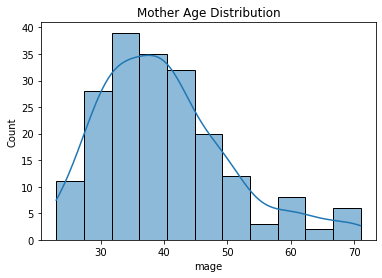

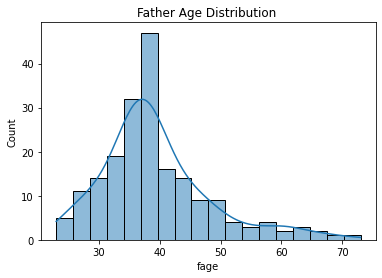

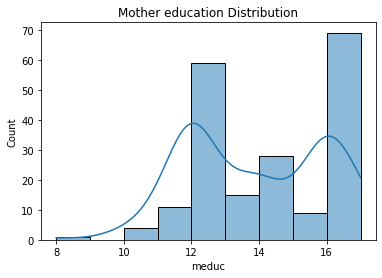

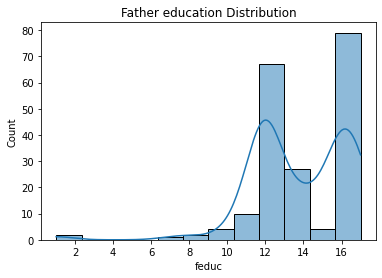

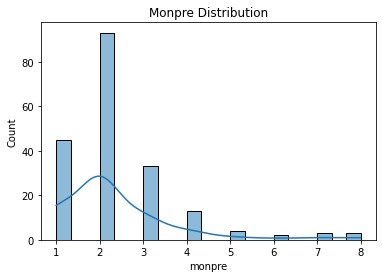

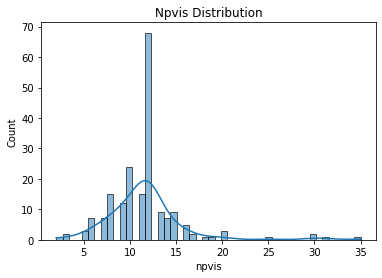

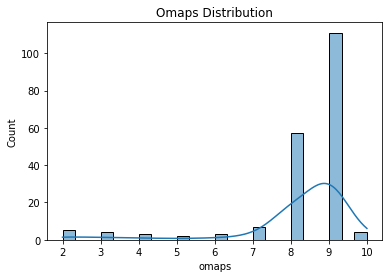

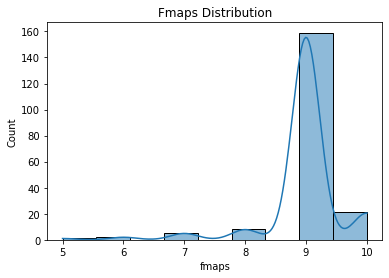

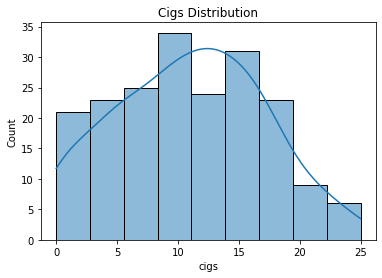

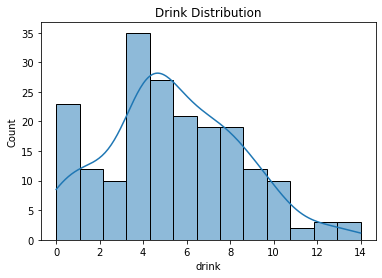

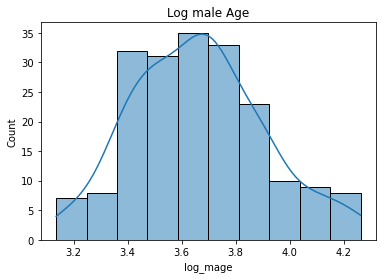

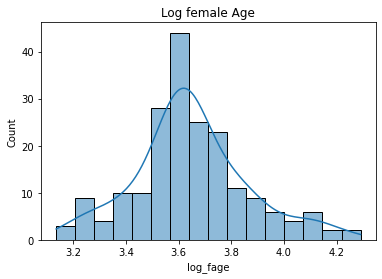

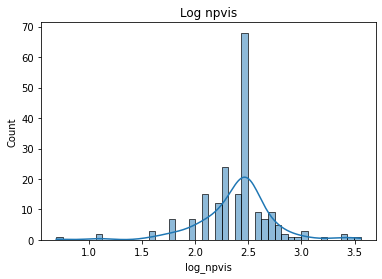

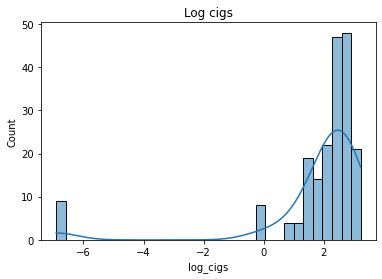

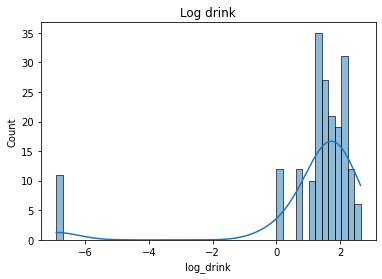

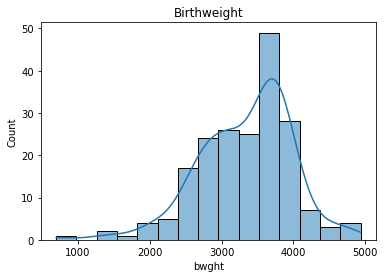

False

In [3]:
#histograms to know which datasets to log
bwl.info()
sns.histplot(data   = bwl,
          x      = 'mage',
          kde    = True)
plt.title(label   = "Mother Age Distribution")
plt.show()
#Chosen to log

sns.histplot(data   = bwl,
          x      = 'fage',
          kde    = True)
plt.title(label   = "Father Age Distribution ")
plt.show()
#Chosen to log

sns.histplot(data   = bwl,
          x      = 'meduc',
          kde    = True)
plt.title(label   = "Mother education Distribution")
plt.show()

sns.histplot(data   = bwl,
          x      = 'feduc',
          kde    = True)
plt.title(label   = "Father education Distribution")
plt.show()

sns.histplot(data   = bwl,
          x      = 'monpre',
          kde    = True)
plt.title(label   = "Monpre Distribution")
plt.show()

sns.histplot(data   = bwl,
          x      = 'npvis',
          kde    = True)
plt.title(label   = "Npvis Distribution")
plt.show()
#Chosen to log

sns.histplot(data   = bwl,
          x      = 'omaps',
          kde    = True)
plt.title(label   = "Omaps Distribution")
plt.show()

sns.histplot(data   = bwl,
          x      = 'fmaps',
          kde    = True)
plt.title(label   = "Fmaps Distribution")
plt.show()

sns.histplot(data   = bwl,
          x      = 'cigs',
          kde    = True)
plt.title(label   = "Cigs Distribution")
plt.show()

sns.histplot(data   = bwl,
          x      = 'drink',
          kde    = True)
plt.title(label   = "Drink Distribution")
plt.show()

#Creating Log columns
bwl['log_mage'] = np.log(bwl['mage'])
bwl['log_fage'] = np.log(bwl['fage'])
bwl['log_npvis'] = np.log(bwl['npvis'])
bwl['log_cigs'] = np.log(bwl['cigs']+0.001) #had to add 0.001 due to 0 values
bwl['log_drink'] = np.log(bwl['drink']+0.001) #had to add 0.001 due to 0 values

#Checking to se if the data is better distributed with log
sns.histplot(data   = bwl,
          x      = 'log_mage',
          kde    = True)
plt.title(label   = "Log male Age")
plt.show()

sns.histplot(data   = bwl,
          x      = 'log_fage',
          kde    = True)
plt.title(label   = "Log female Age")
plt.show()

sns.histplot(data   = bwl,
          x      = 'log_npvis',
          kde    = True)
plt.title(label   = "Log npvis")
plt.show()

#logs for cigs and drinks are useful but I decided to create a categorical value below
sns.histplot(data   = bwl,
          x      = 'log_cigs',
          kde    = True)
plt.title(label   = "Log cigs")
plt.show()

sns.histplot(data   = bwl,
          x      = 'log_drink',
          kde    = True)
plt.title(label   = "Log drink")
plt.show()

sns.histplot(data   = bwl,
          x      = 'bwght',
          kde    = True)
plt.title(label   = "Birthweight")
plt.show()

#Changing the logs from floats to int as it could be inconvenient later
bwl['log_mage'] = bwl['log_mage'].astype(int)
bwl['log_fage'] = bwl['log_fage'].astype(int)
bwl['log_npvis'] = bwl['log_npvis'].astype(int)
bwl['log_cigs'] = bwl['log_cigs'].astype(int)
bwl['log_drink'] = bwl['log_drink'].astype(int)
#dropping redundant columns
bwl.drop(['mage','fage','npvis','mwhte','fwhte','mblck','fblck','moth','foth','omaps','fmaps'],axis=1)
#Searching for Nan values
bwl.isnull().any().any()

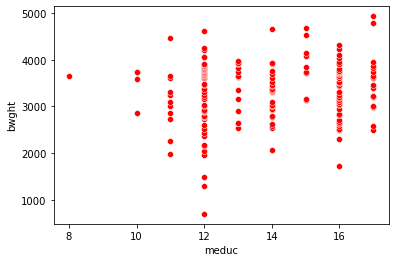

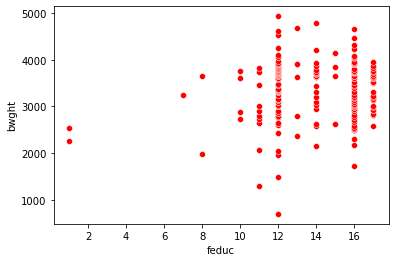

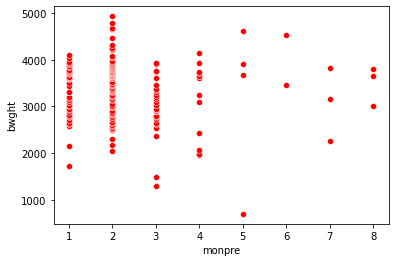

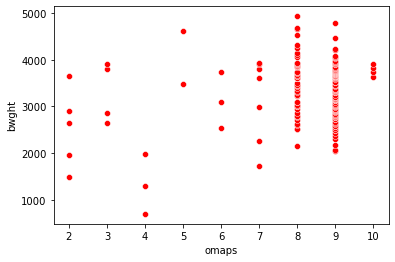

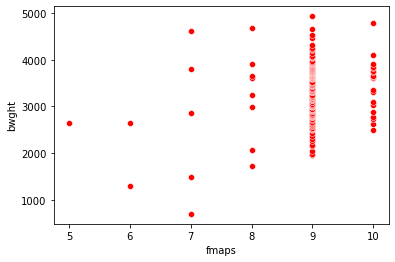

In [4]:
#Scatterplots to see trends
sns.scatterplot(x = bwl['meduc'],
                y = bwl['bwght'],
                color = 'r')
plt.show()

sns.scatterplot(x = bwl['feduc'],
                y = bwl['bwght'],
                color = 'r')
plt.show()

sns.scatterplot(x = bwl['monpre'],
                y = bwl['bwght'],
                color = 'r')
plt.show()

sns.scatterplot(x = bwl['omaps'],
                y = bwl['bwght'],
                color = 'r')
plt.show()

sns.scatterplot(x = bwl['fmaps'],
                y = bwl['bwght'],
                color = 'r')
plt.show()
#No definite trends discovered

In [5]:
#Code easily separate and select columns
for cat in bwl:
    print(f"'{cat}', ")
#Checking if any null values remain    
bwl.isnull().any().any()

'mage', 
'meduc', 
'monpre', 
'npvis', 
'fage', 
'feduc', 
'omaps', 
'fmaps', 
'cigs', 
'drink', 
'male', 
'mwhte', 
'mblck', 
'moth', 
'fwhte', 
'fblck', 
'foth', 
'bwght', 
'm_meduc', 
'm_npvis', 
'm_feduc', 
'log_mage', 
'log_fage', 
'log_npvis', 
'log_cigs', 
'log_drink', 


False

In [6]:
#Creating a vice category for both cigars and alcohol
bw2 = bwl.copy()
#Getting rid of columns we dont need on the second dataset
bw2 = bw2.drop(['log_cigs','log_drink','m_meduc','m_npvis','m_feduc','mage','fage','npvis'],axis = 1)
bw2 = bw2.drop(['mwhte','mblck','moth','fwhte','fblck','foth'],axis = 1)
#creating vice column and getting quantiles to sort
bw2['vic'] = bw2['cigs'] + bw2['drink']
bw2['vic'] = bw2['vic'].astype(int)
subs_qs = bw2['vic'].quantile([0.2,0.4,0.6,0.8,1])
print(subs_qs)

0.2     9.0
0.4    14.0
0.6    18.0
0.8    23.0
1.0    36.0
Name: vic, dtype: float64


In [7]:
#Sorting some columns into categories
for row, col in bw2.iterrows():        
    #creating a range of vices using quantiles
    if bw2.loc[row, 'vic'] < 9:
        bw2.loc[row, 'c_vic'] = 'moderate_risk'
    elif bw2.loc[row, 'vic'] <= 14:
        bw2.loc[row, 'c_vic'] = 'risk'
    elif bw2.loc[row, 'vic'] <= 18:
        bw2.loc[row, 'c_vic'] = 'high_risk'
    elif bw2.loc[row, 'vic'] <= 23:
        bw2.loc[row, 'c_vic'] = 'very_high_risk'
    elif bw2.loc[row, 'vic'] <= 36:
        bw2.loc[row, 'c_vic'] = 'top_risk'
    else:
        print(f"""Something went wrong with {bw2.loc[row, 'vic']}""")
    
    #Adding parents education to reduce columns
    bw2.loc[row, 'peduc'] = (bw2.loc[row, 'meduc'] + bw2.loc[row, 'feduc'])/2
        
#converting categories into dummy variables  
bw2 = (pd.get_dummies(columns = ['c_vic'], data = bw2)).astype(int)
bw2 = bw2.drop(['vic','meduc','feduc','c_vic_moderate_risk'],axis = 1)
bw2.isnull().any().any()
bw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   monpre                196 non-null    int64
 1   omaps                 196 non-null    int64
 2   fmaps                 196 non-null    int64
 3   cigs                  196 non-null    int64
 4   drink                 196 non-null    int64
 5   male                  196 non-null    int64
 6   bwght                 196 non-null    int64
 7   log_mage              196 non-null    int64
 8   log_fage              196 non-null    int64
 9   log_npvis             196 non-null    int64
 10  peduc                 196 non-null    int64
 11  c_vic_high_risk       196 non-null    int64
 12  c_vic_risk            196 non-null    int64
 13  c_vic_top_risk        196 non-null    int64
 14  c_vic_very_high_risk  196 non-null    int64
dtypes: int64(15)
memory usage: 23.1 KB


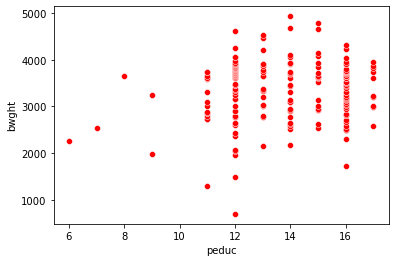

In [8]:
#Testing if adding parents education could yield positive results
sns.scatterplot(x = bw2['peduc'],
                y = bw2['bwght'],
                color = 'r')
plt.show()
bw2['peduc'] = np.log(bw2['peduc']).astype(int)

In [9]:
#Creating the training and testing sets
bwlx = bwl.drop(['bwght'],axis = 1)
bwly = bwl.loc[:,'bwght']
bwly_s = scale(bwl.loc[:,'bwght'])
#The line below was a series of attempts at removing random columns until the gap decreassed
bwlx_c = bw2.drop(['bwght','monpre','male','omaps','fmaps','log_npvis'],axis = 1)
bwlx_s = scale(bwlx_c)
bwly_l = np.log(bwly)

#for OLS im using the standard dataset with logs
x_train_ols, x_test_ols, y_train_ols, y_test_ols = train_test_split(
            bwlx,
            bwly,
            test_size = 0.25,
            random_state = 219)

print(f"""
Training Sets OLS
{x_train_ols.shape} & {y_train_ols.shape}

Testing Sets OLS
{x_test_ols.shape} & {y_test_ols.shape}
""")

#for Lasso im using the standard dataset with logs
#done separately from OLS training/testing in case a better X&Y is found
x_train_la, x_test_la, y_train_la, y_test_la = train_test_split(
            bwlx_c,
            bwly,
            test_size = 0.25,
            random_state = 219)

print(f"""
Training Sets Lasso
{x_train_la.shape} & {y_train_la.shape}

Testing Sets Lasso
{x_test_la.shape} & {y_test_la.shape}
""")

#for ARD im using the scaled dataset after using dummies
x_train_ard, x_test_ard, y_train_ard, y_test_ard = train_test_split(
            bwlx_s,
            bwly_s,
            test_size = 0.25,
            random_state = 219)

print(f"""
Training Sets ARD
{x_train_ard.shape} & {y_train_ard.shape}

Testing Sets ARD
{x_test_ard.shape} & {y_test_ard.shape}
""")


Training Sets OLS
(147, 25) & (147,)

Testing Sets OLS
(49, 25) & (49,)


Training Sets Lasso
(147, 9) & (147,)

Testing Sets Lasso
(49, 9) & (49,)


Training Sets ARD
(147, 9) & (147,)

Testing Sets ARD
(49, 9) & (49,)



In [10]:
#OLS model (NOT chosen)
lr = LinearRegression()
lr_fit = lr.fit(x_train_ols, y_train_ols)
lr_pred = lr_fit.predict(x_test_ols)

#scores
ols_train = lr.score(x_train_ols, y_train_ols).round(4)
ols_test = lr.score(x_test_ols, y_test_ols).round(4) 
ols_gap = (lr.score(x_train_ols, y_train_ols)-lr.score(x_test_ols, y_test_ols)).round(4)
ols_results = (f"""OLS Training = {ols_train}
OLS Testing  = {ols_test}
OLS Gap      = {ols_gap}
""")
print(ols_results)

OLS Training = 0.7834
OLS Testing  = 0.5029
OLS Gap      = 0.2805



In [11]:
#Lasso model (CHOSEN MODEL!)
lasso_model = Lasso(alpha = 1.0, normalize = True)
la_train = lasso_model.fit(x_train_la, y_train_la)
la_test = la_train.predict(x_test_la)

#scores
la_train_s = lasso_model.score(x_train_la, y_train_la)
la_test_s = lasso_model.score(x_test_la, y_test_la)
la_gap_s = (la_train_s-la_test_s).round(4)

#results
lasso_results = (f"""Lasso Training = {la_train_s.round(4)}
Lasso Testing  = {la_test_s.round(4)}
Lasso Gap      = {la_gap_s}
""")
print(lasso_results)
#Code i used to calculate marks
if la_gap_s > 0.05:
    print(f"""Marks for Lasso: {(la_test_s-la_gap_s+0.05).round(3)}""")
else:
    print(f"""Marks for Lasso: {(la_test_s).round(3)}""")

Lasso Training = 0.7463
Lasso Testing  = 0.7029
Lasso Gap      = 0.0435

Marks for Lasso: 0.703


In [12]:
#ARD model (not chosen)
ard_model = linear_model.ARDRegression()
ard_fit = ard_model.fit(x_train_ard, y_train_ard)
ard_pred = ard_fit.predict(x_test_ard)

#scores
ard_train_s = ard_model.score(x_train_ard, y_train_ard)
ard_test_s = ard_model.score(x_test_ard, y_test_ard)
ard_gap_s = (ard_train_s-ard_test_s).round(4)

#results
ard_results = (f"""ARD Training = {ard_train_s.round(4)}
ARD Testing  = {ard_test_s.round(4)}
ARD Gap      = {ard_gap_s}
""")
print(ard_results)
#Code i used to calculate marks
if ard_gap_s > 0.05:
    print(f"""Marks for ARD: {(ard_test_s-ard_gap_s+0.05).round(3)}""")
else:
    print(f"""Marks for ARD: {(ard_test_s).round(3)}""")

ARD Training = 0.7463
ARD Testing  = 0.699
ARD Gap      = 0.0473

Marks for ARD: 0.699


In [13]:
#final output, I chose Lasso
print(ols_results)
print(lasso_results)
print(ard_results)

OLS Training = 0.7834
OLS Testing  = 0.5029
OLS Gap      = 0.2805

Lasso Training = 0.7463
Lasso Testing  = 0.7029
Lasso Gap      = 0.0435

ARD Training = 0.7463
ARD Testing  = 0.699
ARD Gap      = 0.0473



In [15]:
if got.loc[row, 'mother'].isnull():
        got.loc[row, 'mother_known'] = 0
    elif not got.loc[row, 'mother'].isnull():
        got.loc[row, 'mother_known'] = 1
    else:
        print("Problem with mother_known")
    if got.loc[row, 'father'].isnull():
        got.loc[row, 'father_known'] = 0
    elif not got.loc[row, 'father'].isnull():
        got.loc[row, 'father_known'] = 1
    else:
        print("Problem with father_known")
    if got.loc[row, 'heir'].isnull():
        got.loc[row, 'heir_known'] = 0
    elif not got.loc[row, 'heir'].isnull():
        got.loc[row, 'heir_known'] = 1
    else:
        print("Problem with heir_known")
    if got.loc[row, 'spouse'].isnull():
        got.loc[row, 'spouse_known'] = 0
    elif not got.loc[row, 'spouse'].isnull():
        got.loc[row, 'spouse_known'] = 1
    else:
        print("Problem with spouse_known")
        
        
        
        
if not got.loc[row, 'mother'].isnull():
    got.loc[row, 'known_fam'] += 1
if not got.loc[row, 'father'].isnull():
    got.loc[row, 'known_fam'] += 1
if not got.loc[row, 'spouse'].isnull():
    got.loc[row, 'known_'] += 1
if not got.loc[row, 'heir'].isnull():
    got.loc[row, 'known_fam'] += 1
    
    
    ,'age','dateOfBirth',

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)